# Plotting the results of spacetrees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dispersal rate

First we load the dispersal rates

In [75]:
prefix = 'data/test_with_ancients'
d = 2
filename = prefix + '_10M_%sT_%dd.sigma'
sigmas = []
Ts = [None,10000,1000,100] #time cutoffs
for T in Ts:
    sigmas.append(np.loadtxt(filename %(T,d), delimiter=','))

And we can compare them to the simulated truth

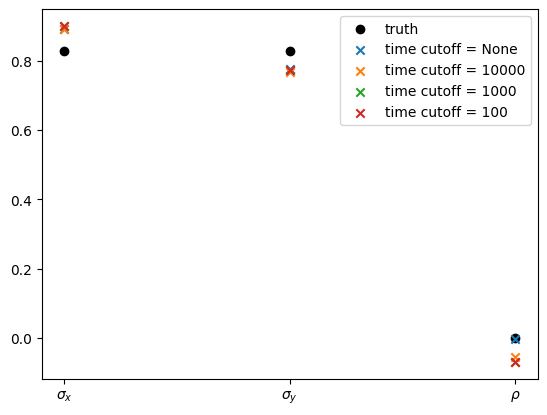

In [90]:
truth = (0.75**2 + 0.5**2/2)**0.5 #square root of (mother-offspring var plus half of father-offspring var)
plt.scatter([1,2,3],[truth,truth,0], label='truth', c='k', marker='o')
for i,sigma in enumerate(sigmas):
    plt.scatter([1,2,3], sigma[:3], label='time cutoff = %s' %str(Ts[i]), marker='x')
plt.xticks([1,2,3], labels=[r'$\sigma_x$',r'$\sigma_y$',r'$\rho$'])
plt.legend()
plt.show()

We see we do a decent job estimating the standard deviations in x and y movements, $\sigma_x$ and $\sigma_y$, and the correlations. The time cutoff isn't having a big effect here for some reason.

## Ancestor locations

Load the data

In [95]:
prefix = 'data/test_with_ancients'
d = 2
locations = np.loadtxt(prefix + '_%dd.locations' %d) #sample locations
locations_with_ancients = locations

T = None #time cutoff
loci = [1,11,21,31,41,51,61,71,81,91] #loci at which we located ancestors
sample = 0 #sample we are interested in plotting

ancestor_locations = []
for locus in loci:
    with open(prefix + '_chr1_%dlocus_10M_%sT_%dd_Alls_Allt.locs' %(locus,str(T),d), 'r') as f:
        for line in f:
            if line.split(',')[0]==str(sample):
                ancestor_locations.append([float(i) for i in line.strip().split(',')[1:]]) #time,x,y
ancestor_locations = np.array(ancestor_locations)

And now plot the distribution of ancestor locations over loci at various times

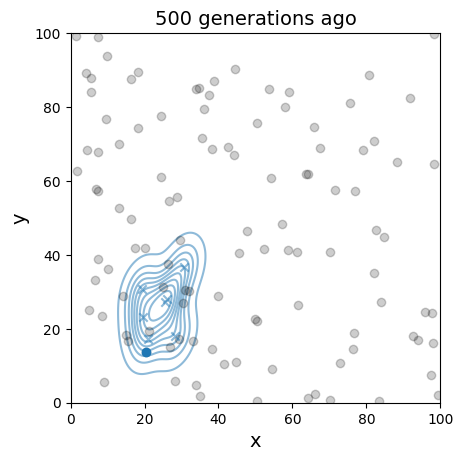

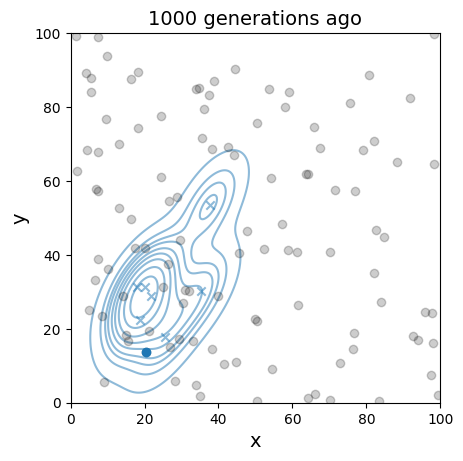

In [96]:
ancestor_times = np.unique(ancestor_locations[:,0]) #times we are looking at
sample_color = plt.get_cmap('tab10')(0) #choose your color

for i,t in enumerate(ancestor_times):
    
    fig = plt.figure() #set up figure
    ax = fig.add_subplot(111, aspect='equal') #and axis
    
    ax.scatter(locations[:,0], locations[:,1], color='k', alpha=0.1) #all samples
    ax.scatter(locations[sample,0], locations[sample,1], color=sample_color, alpha=1) #focal sample

    ax.scatter(ancestor_locations[i::3,1],ancestor_locations[i::3,2], color=sample_color, alpha=0.5, marker='x')
    sns.kdeplot(x=ancestor_locations[i::3,1], y=ancestor_locations[i::3,2], ax=ax, zorder=0, color=sample_color, alpha=0.5) #inferred ancestor distribution
    
    # aesthetics
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title('%d generations ago' %t, fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    
    plt.show()

Using a larger chromosome with more loci, or additional chromosomes, would allow us to locate ancestors at more unrelated parts of the genome, giving us more information about the distribution, but I hope this gets you started.